Welcome to the Rocket Trajectory Simulation!
Available planets:
- Mercury
- Venus
- Earth
- Mars
- Jupiter
- Saturn
- Uranus
- Neptune
- Pluto
Enter the name of the planet: Earth
Enter the initial velocity (m/s): 3000
Enter the launch angle (degrees): 45


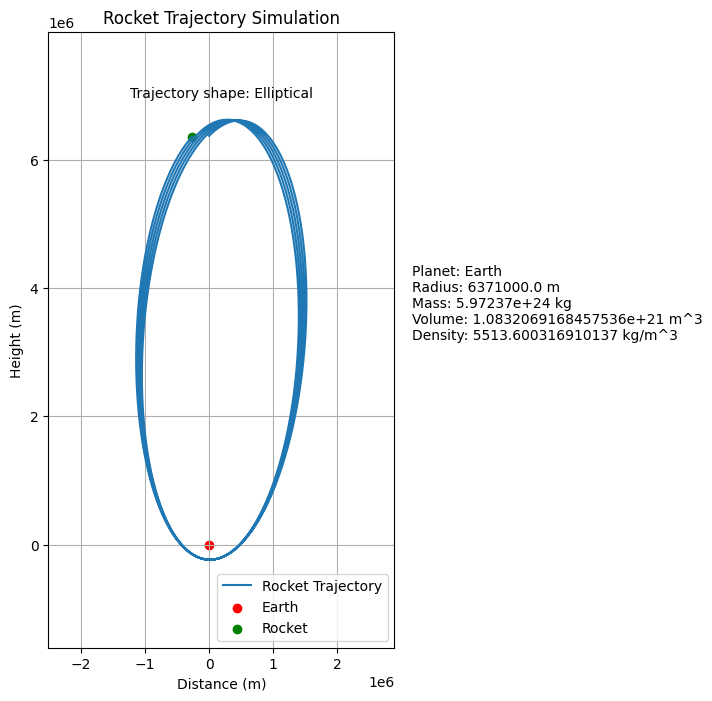

In [ ]:
import math
import matplotlib.pyplot as plt

class Planet:
    def __init__(self, name, radius, mass):
        """
        Initialize attributes of the Planet class.

        Args:
            name (str): Name of the planet.
            radius (float): Radius of the planet in meters.
            mass (float): Mass of the planet in kilograms.
        """
        self.name = name  # Name of the planet
        self.radius = radius  # Radius of the planet in meters
        self.mass = mass  # Mass of the planet in kilograms

        # Calculate volume of the planet using the formula for the volume of a sphere
        self.volume = (4/3) * math.pi * (radius ** 3)  # Volume of the planet in cubic meters

        # Calculate density of the planet
        self.density = mass / self.volume  # Density of the planet in kilograms per cubic meter

class RocketSimulation:
    def __init__(self):
        """
        Initialize attributes of the RocketSimulation class.
        """
        self.G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2

        # Dictionary to store instances of the Planet class
        self.planets = {
            'Mercury': Planet('Mercury', 2439.7e3, 3.3011e23),
            'Venus': Planet('Venus', 6051.8e3, 4.8675e24),
            'Earth': Planet('Earth', 6371.0e3, 5.97237e24),
            'Mars': Planet('Mars', 3389.5e3, 6.4171e23),
            'Jupiter': Planet('Jupiter', 69911e3, 1.8982e27),
            'Saturn': Planet('Saturn', 58232e3, 5.6834e26),
            'Uranus': Planet('Uranus', 25362e3, 8.6810e25),
            'Neptune': Planet('Neptune', 24622e3, 1.02413e26),
            'Pluto': Planet('Pluto', 1188.3e3, 1.303e22)
        }

    def validate_planet_input(self, planet):
        """
        Check if the entered planet name is valid.

        Args:
            planet (str): Name of the planet.

        Returns:
            bool: True if the planet name is valid, False otherwise.
        """
        return planet in self.planets

    def get_user_input(self):
        """
        Prompt the user to enter the planet name, initial velocity, and launch angle.

        Returns:
            tuple: A tuple containing the planet name (str), initial velocity (float), and launch angle (float).
        """
        while True:
            planet = input("Enter the name of the planet: ")
            if self.validate_planet_input(planet):
                break
            else:
                print("Invalid planet name. Please enter a valid planet.")

        velocity = float(input("Enter the initial velocity (m/s): "))
        angle_degrees = float(input("Enter the launch angle (degrees): "))
        return planet, velocity, angle_degrees

    def calculate_trajectory(self, planet_name, velocity, angle_degrees):
        """
        Calculate the trajectory of the rocket based on given parameters.

        Args:
            planet_name (str): Name of the planet.
            velocity (float): Initial velocity of the rocket in m/s.
            angle_degrees (float): Launch angle of the rocket in degrees.

        Returns:
            tuple: Two lists containing x and y coordinates of the trajectory.
        """
        planet = self.planets[planet_name]
        angle_radians = math.radians(angle_degrees)
        radius = planet.radius
        mass = planet.mass

        x = [0]  # List to store x-coordinate of positions
        y = [radius]  # List to store y-coordinate of positions

        v0_x = velocity * math.cos(angle_radians)  # Initial velocity in x-direction
        v0_y = velocity * math.sin(angle_radians)  # Initial velocity in y-direction

        a_x = - self.G * mass / (radius ** 2)  # Initial acceleration in x-direction
        a_y = 0  # Initial acceleration in y-direction (assuming rocket doesn't move vertically)

        dt = 1  # Time step

        # Perform simulation for 10000 time steps
        for _ in range(10000):
            v_x = v0_x + a_x * dt  # Update velocity in x-direction
            v_y = v0_y + a_y * dt  # Update velocity in y-direction

            x_new = x[-1] + v_x * dt  # Update x-coordinate of position
            y_new = y[-1] + v_y * dt  # Update y-coordinate of position

            r = math.sqrt(x_new ** 2 + y_new ** 2)  # Distance from the planet's center
            a_x = - self.G * mass * x_new / (r ** 3)  # Update acceleration in x-direction
            a_y = - self.G * mass * y_new / (r ** 3)  # Update acceleration in y-direction

            x.append(x_new)
            y.append(y_new)

            v0_x = v_x
            v0_y = v_y

        return x, y

    def analyze_trajectory(self, x, y, planet_name):
        """
        Analyze the trajectory shape based on energy considerations.

        Args:
            x (list): List of x-coordinates of the trajectory.
            y (list): List of y-coordinates of the trajectory.
            planet_name (str): Name of the planet.

        Returns:
            str: The shape of the trajectory (e.g., "Elliptical", "Hyperbolic", "Parabolic", "Circular", "Unknown").
        """
        planet = self.planets[planet_name]
        r = [math.sqrt(px**2 + py**2) for px, py in zip(x, y)]
        v = [math.sqrt((px2 - px1)**2 + (py2 - py1)**2) for px1, py1, px2, py2 in zip(x[:-1], y[:-1], x[1:], y[1:])]
        kinetic_energy = [0.5 * vi**2 for vi in v]
        potential_energy = [- self.G * planet.mass / ri for ri in r[1:]]
        total_energy = [ke + pe for ke, pe in zip(kinetic_energy, potential_energy)]

        if all(energy > 0 for energy in total_energy):
            return "Hyperbolic"
        elif all(energy < 0 for energy in total_energy):
            return "Elliptical"
        elif all(math.isclose(energy, 0) for energy in total_energy):
            if math.isclose(kinetic_energy[-1], potential_energy[-1]):
                return "Circular"
            else:
                return "Parabolic"
        else:
            return "Unknown"

    def plot_trajectory(self, planet_name, velocity, angle_degrees):
        """
        Plot the rocket trajectory on a 2D graph.

        Args:
            planet_name (str): Name of the planet.
            velocity (float): Initial velocity of the rocket in m/s.
            angle_degrees (float): Launch angle of the rocket in degrees.
        """
        x, y = self.calculate_trajectory(planet_name, velocity, angle_degrees)
        trajectory_shape = self.analyze_trajectory(x, y, planet_name)

        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Rocket Trajectory Simulation")
        ax.plot(x, y, label="Rocket Trajectory")
        ax.scatter(0, 0, color='red', label=planet_name)
        ax.scatter(x[-1], y[-1], color='green', label="Rocket")
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_aspect('equal')

        max_range = max(max(x) - min(x), max(y) - min(y))
        margin = max_range * 0.2
        ax.set_xlim(min(x) - margin, max(x) + margin)
        ax.set_ylim(min(y) - margin, max(y) + margin)

        # Display planet data
        planet_data = self.planets[planet_name]
        plt.text(1.05, 0.5, f"Planet: {planet_name}\nRadius: {planet_data.radius} m\nMass: {planet_data.mass} kg\nVolume: {planet_data.volume} m^3\nDensity: {planet_data.density} kg/m^3", transform=ax.transAxes)

        # Display trajectory shape
        plt.text(0.5, 0.9, f"Trajectory shape: {trajectory_shape}", ha='center', va='center', transform=ax.transAxes)

        plt.xlabel('Distance (m)')
        plt.ylabel('Height (m)')

        plt.show()

    def main(self):
        """
        Main function to run the simulation.
        """
        print("Welcome to the Rocket Trajectory Simulation!")
        print("Available planets:")
        for planet in self.planets:
            print("-", planet)

        planet_name, velocity, angle_degrees = self.get_user_input()
        self.plot_trajectory(planet_name, velocity, angle_degrees)

if __name__ == "__main__":
    simulation = RocketSimulation()
    simulation.main()
